In [23]:
# import numpy as np
# import PIL.Image

# import torch, torchvision
# from torchvision import datasets, models, transforms
# from torch.utils.data import DataLoader
# import torch.optim as optim
# import time
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from matplotlib import pyplot as plt

# import os


# image_size = 100
# numero_de_epocas = 20
# bs = 32
# dataset = r'../Essenciais2/'
# pasta_treino = os.path.join(dataset, 'treino')
# pasta_validacao = os.path.join(dataset, 'validacao')
# pasta_teste = os.path.join(dataset, 'teste')
# numero_de_classes = len(os.listdir(pasta_validacao))

# from torchvision import transforms

# transformacoes_de_imagens = { 
#     'treino': transforms.Compose([
#         transforms.RandomHorizontalFlip(),
#         transforms.Resize(size=[image_size, image_size]),
#         transforms.RandomRotation(20),
#         # transforms.Grayscale(num_output_channels=1), 
#         transforms.ToTensor()
#     ]),

#     'validacao': transforms.Compose([
#         transforms.Resize(size=[image_size, image_size]),
#         # transforms.Grayscale(num_output_channels=1),  
#         transforms.ToTensor(),
#     ]),
#     'teste': transforms.Compose([
#         transforms.Resize(size=[image_size, image_size]),
#         # transforms.Grayscale(num_output_channels=1),  
#         transforms.ToTensor(),
#     ])
# }


# data = {
#     'treino': datasets.ImageFolder(root=pasta_treino, transform=transformacoes_de_imagens['treino']),
#     'validacao': datasets.ImageFolder(root=pasta_validacao, transform=transformacoes_de_imagens['validacao'])
# }

# # Mapear os índices com os nomes das classes
# indice_para_classe = {v: k for k, v in data['treino'].class_to_idx.items()}
# print(indice_para_classe)

# # Quantidade de imagens para serem utilizadas para calcular erro médio e acurácia
# num_imagens_treino = len(data['treino'])
# num_imagens_validacao = len(data['validacao'])

# # Cria os DataLoaders para treino e validação
# data_loader_treino = DataLoader(data['treino'], batch_size=bs, shuffle=True)
# data_loader_validacao = DataLoader(data['validacao'], batch_size=bs, shuffle=True)

# # Carregar o modelo ResNet-50 pré-treinado
# resnet50 = models.resnet50(pretrained=True)

# # Congelar os parâmetros da rede pré-treinada
# for param in list(resnet50.parameters())[-4:]:
#     param.requires_grad = True

# # Modificar a última camada totalmente conectada (fc) para o número de classes do problema
# num_features = resnet50.fc.in_features
# resnet50.fc = nn.Sequential(
#     nn.Linear(num_features, 512),
#     nn.ReLU(),
#     nn.Dropout(0.3),
#     nn.Linear(512, numero_de_classes),
#     nn.LogSoftmax(dim=1)
# )

# # Definir algoritmo de otimização e função de erro
# funcao_erro = nn.NLLLoss()  # Negative Log Likelihood Loss
# otimizador = optim.Adam(resnet50.parameters(), lr=0.0001)

# # Função para treinamento e validação
# def treinar_e_validar(modelo, metrica_erro, otimizador_sgd, epocas=25):
#     historico = []
#     melhor_acuracia = 0.0
#     melhor_modelo = None

#     for epoca in range(epocas):
#         inicio_epoca = time.time()
#         print("\n\nÉpoca: {}/{}".format(epoca + 1, epocas))

#         modelo.train()
#         erro_treino = 0.0
#         acuracia_treino = 0.0
#         erro_validacao = 0.0
#         acuracia_validacao = 0.0

#         for i, (entradas, labels) in enumerate(data_loader_treino):
#             entradas = entradas.to(device)
#             labels = labels.to(device)

#             otimizador_sgd.zero_grad()
#             saidas = modelo(entradas)
#             erro = metrica_erro(saidas, labels)
#             erro.backward()
#             otimizador_sgd.step()

#             erro_treino += erro.item() * entradas.size(0)
#             valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
#             predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))
#             acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))
#             acuracia_treino += acuracia.item() * entradas.size(0)

#             print("Treino Epoca - Lote número {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(i, erro.item(), acuracia.item()))

#         with torch.no_grad():
#             modelo.eval()
#             for j, (entradas, labels) in enumerate(data_loader_validacao):
#                 entradas = entradas.to(device)
#                 labels = labels.to(device)
#                 saidas = modelo(entradas)
#                 erro = metrica_erro(saidas, labels)
#                 erro_validacao += erro.item() * entradas.size(0)
#                 valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
#                 predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))
#                 acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))
#                 acuracia_validacao += acuracia.item() * entradas.size(0)

#                 print("Validação - Lote número: {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(j, erro.item(), acuracia.item()))

#         erro_medio_treino = erro_treino / num_imagens_treino
#         acuracia_media_treino = acuracia_treino / num_imagens_treino
#         erro_medio_validacao = erro_validacao / num_imagens_validacao
#         acuracia_media_validacao = acuracia_validacao / num_imagens_validacao

#         historico.append([erro_medio_treino, erro_medio_validacao, acuracia_media_treino, acuracia_media_validacao])

#         fim_epoca = time.time()

#         print("Época : {:03d}, Treino: Erro: {:.4f}, Acurácia: {:.4f}%, \n\t\tValidação : Erro : {:.4f}, Acurácia: {:.4f}%, Tempo: {:.4f}s".format(
#             epoca + 1, erro_medio_treino, acuracia_media_treino * 100, erro_medio_validacao, acuracia_media_validacao * 100, fim_epoca - inicio_epoca))

#         if acuracia_media_validacao > melhor_acuracia:
#             melhor_acuracia = acuracia_media_validacao
#             torch.save(modelo, './modelos/melhor_modelo01k.pt')
#             melhor_modelo = modelo

#     return melhor_modelo, historico

# # Se você for rico e tiver uma RTX 3080 (que sonho!!)
# # Mas se não for, sem problemas, sua CPU provavelmente vai dar conta do recado!
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Imprime se vai ser CPU ou alguma GPU
# print(f'{device}\n')

# # Define o número de épocas
# numero_de_epocas = 20

# # treina o modelo! Finalmente!!
# resnet50 = resnet50.to(device)
# modelo_treinado, historico = treinar_e_validar(resnet50, funcao_erro, otimizador, numero_de_epocas)


In [24]:
import numpy as np
import PIL.Image

import torch, torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from matplotlib import pyplot as plt

import os


image_size = 100
numero_de_epocas = 20
bs = 32
dataset = r'../Essenciais2/'
pasta_treino = os.path.join(dataset, 'treino')
pasta_validacao = os.path.join(dataset, 'validacao')
pasta_teste = os.path.join(dataset, 'teste')
numero_de_classes = len(os.listdir(pasta_validacao))

from torchvision import transforms

transformacoes_de_imagens = { 
    'treino': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.Resize(size=[image_size, image_size]),
        transforms.RandomRotation(20),
        # transforms.Grayscale(num_output_channels=1), 
        transforms.ToTensor()
    ]),

    'validacao': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        # transforms.Grayscale(num_output_channels=1),  
        transforms.ToTensor(),
    ]),
    'teste': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        # transforms.Grayscale(num_output_channels=1),  
        transforms.ToTensor(),
    ])
}


data = {
    'treino': datasets.ImageFolder(root=pasta_treino, transform=transformacoes_de_imagens['treino']),
    'validacao': datasets.ImageFolder(root=pasta_validacao, transform=transformacoes_de_imagens['validacao'])
}

# Mapear os índices com os nomes das classes
indice_para_classe = {v: k for k, v in data['treino'].class_to_idx.items()}
print(indice_para_classe)

# Quantidade de imagens para serem utilizadas para calcular erro médio e acurácia
num_imagens_treino = len(data['treino'])
num_imagens_validacao = len(data['validacao'])

# Cria os DataLoaders para treino e validação
data_loader_treino = DataLoader(data['treino'], batch_size=bs, shuffle=True)
data_loader_validacao = DataLoader(data['validacao'], batch_size=bs, shuffle=True)

# Carregar o modelo ResNet-50 pré-treinado
resnet50 = models.resnet50(pretrained=True)

# Congelar os parâmetros da rede pré-treinada
for param in list(resnet50.parameters())[-4:]:
    param.requires_grad = True

# Modificar a última camada totalmente conectada (fc) para o número de classes do problema
num_features = resnet50.fc.in_features
resnet50.fc = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, numero_de_classes),
    nn.LogSoftmax(dim=1)
)

# Definir algoritmo de otimização e função de erro
funcao_erro = nn.NLLLoss()  # Negative Log Likelihood Loss
otimizador = optim.Adam(resnet50.parameters(), lr=0.0001)


{0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}


In [25]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Função para calcular o F1-Score durante a validação
def calcular_f1_score(modelo, data_loader):
    modelo.eval()
    todas_predicoes = []
    todos_labels = []
    
    with torch.no_grad():
        for entradas, labels in data_loader:
            entradas = entradas.to(device)
            labels = labels.to(device)
            saidas = modelo(entradas)
            _, predicoes = torch.max(saidas, 1)
            todas_predicoes.extend(predicoes.cpu().numpy())
            todos_labels.extend(labels.cpu().numpy())
    
    return f1_score(todos_labels, todas_predicoes, average='weighted')

# Função para plotar a matriz de confusão
def plotar_matriz_confusao(modelo, data_loader, classes):
    modelo.eval()
    todas_predicoes = []
    todos_labels = []
    
    with torch.no_grad():
        for entradas, labels in data_loader:
            entradas = entradas.to(device)
            labels = labels.to(device)
            saidas = modelo(entradas)
            _, predicoes = torch.max(saidas, 1)
            todas_predicoes.extend(predicoes.cpu().numpy())
            todos_labels.extend(labels.cpu().numpy())
    
    matriz_confusao = confusion_matrix(todos_labels, todas_predicoes)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Modificar a função de treinamento para calcular e registrar o F1-Score
def treinar_e_validar(modelo, metrica_erro, otimizador_sgd, epocas=25,nameModel='a.pt'):
    historico = []
    melhor_acuracia = 0.0
    melhor_f1_score = 0.0
    melhor_modelo = None

    for epoca in range(epocas):
        inicio_epoca = time.time()
        print("\n\nÉpoca: {}/{}".format(epoca + 1, epocas))

        modelo.train()
        erro_treino = 0.0
        acuracia_treino = 0.0
        erro_validacao = 0.0
        acuracia_validacao = 0.0

        for i, (entradas, labels) in enumerate(data_loader_treino):
            entradas = entradas.to(device)
            labels = labels.to(device)

            otimizador_sgd.zero_grad()
            saidas = modelo(entradas)
            erro = metrica_erro(saidas, labels)
            erro.backward()
            otimizador_sgd.step()

            erro_treino += erro.item() * entradas.size(0)
            valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
            predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))
            acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))
            acuracia_treino += acuracia.item() * entradas.size(0)

            print("Treino Epoca - Lote número {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(i, erro.item(), acuracia.item()))

        with torch.no_grad():
            modelo.eval()
            for j, (entradas, labels) in enumerate(data_loader_validacao):
                entradas = entradas.to(device)
                labels = labels.to(device)
                saidas = modelo(entradas)
                erro = metrica_erro(saidas, labels)
                erro_validacao += erro.item() * entradas.size(0)
                valores_maximos, indices_dos_valores_maximos = torch.max(saidas.data, 1)
                predicoes_corretas = indices_dos_valores_maximos.eq(labels.data.view_as(indices_dos_valores_maximos))
                acuracia = torch.mean(predicoes_corretas.type(torch.FloatTensor))
                acuracia_validacao += acuracia.item() * entradas.size(0)

                print("Validação - Lote número: {:03d}, Erro: {:.4f}, Acurácia: {:.4f}".format(j, erro.item(), acuracia.item()))

        erro_medio_treino = erro_treino / num_imagens_treino
        acuracia_media_treino = acuracia_treino / num_imagens_treino
        erro_medio_validacao = erro_validacao / num_imagens_validacao
        acuracia_media_validacao = acuracia_validacao / num_imagens_validacao

        # Calcular F1-Score na validação
        f1_score_validacao = calcular_f1_score(modelo, data_loader_validacao)
        print(f'F1-Score na Validação: {f1_score_validacao:.4f}')

        historico.append([erro_medio_treino, erro_medio_validacao, acuracia_media_treino, acuracia_media_validacao, f1_score_validacao])

        fim_epoca = time.time()

        print("Época : {:03d}, Treino: Erro: {:.4f}, Acurácia: {:.4f}%, \n\t\tValidação : Erro : {:.4f}, Acurácia: {:.4f}%, F1-Score: {:.4f}, Tempo: {:.4f}s".format(
            epoca + 1, erro_medio_treino, acuracia_media_treino * 100, erro_medio_validacao, acuracia_media_validacao * 100, f1_score_validacao, fim_epoca - inicio_epoca))

        if f1_score_validacao > melhor_f1_score:
            melhor_f1_score = f1_score_validacao
            torch.save(modelo, nameModel)
            melhor_modelo = modelo

    print(f'Melhor F1-Score obtido: {melhor_f1_score:.4f}')
    return melhor_modelo, historico

# Definir classes para o dataset
classes = [classe for classe in os.listdir(pasta_validacao)]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet50 = resnet50.to(device)


In [26]:

# dataset = r'../Essenciais2/'
# pasta_treino = os.path.join(dataset, 'treino')
# pasta_validacao = os.path.join(dataset, 'validacao')
# pasta_teste = os.path.join(dataset, 'teste')

# modelo_treinado, historico = treinar_e_validar(resnet50, funcao_erro, otimizador, numero_de_epocas,"Essenciais2.pt")

# # Plotar a matriz de confusão do melhor modelo
# plotar_matriz_confusao(modelo_treinado, data_loader_validacao, classes)

In [27]:

# dataset = r'../Dados1/'
# pasta_treino = os.path.join(dataset, 'treino')
# pasta_validacao = os.path.join(dataset, 'validacao')
# pasta_teste = os.path.join(dataset, 'teste')

# modelo_treinado, historico = treinar_e_validar(resnet50, funcao_erro, otimizador, numero_de_epocas,'Dados1.pt')

# # Plotar a matriz de confusão do melhor modelo
# plotar_matriz_confusao(modelo_treinado, data_loader_validacao, classes)



Época: 1/20
Treino Epoca - Lote número 000, Erro: 1.8224, Acurácia: 0.1250
Treino Epoca - Lote número 001, Erro: 1.8234, Acurácia: 0.1875
Treino Epoca - Lote número 002, Erro: 1.7613, Acurácia: 0.1875
Treino Epoca - Lote número 003, Erro: 1.8049, Acurácia: 0.1875
Treino Epoca - Lote número 004, Erro: 1.7084, Acurácia: 0.3125
Treino Epoca - Lote número 005, Erro: 1.6195, Acurácia: 0.3750
Treino Epoca - Lote número 006, Erro: 1.7937, Acurácia: 0.2812
Treino Epoca - Lote número 007, Erro: 1.6426, Acurácia: 0.3750
Treino Epoca - Lote número 008, Erro: 1.8443, Acurácia: 0.1875
Treino Epoca - Lote número 009, Erro: 1.6814, Acurácia: 0.2500
Treino Epoca - Lote número 010, Erro: 1.6865, Acurácia: 0.3125
Treino Epoca - Lote número 011, Erro: 1.6745, Acurácia: 0.3438
Treino Epoca - Lote número 012, Erro: 1.5595, Acurácia: 0.3750
Treino Epoca - Lote número 013, Erro: 1.6928, Acurácia: 0.2500
Treino Epoca - Lote número 014, Erro: 1.6782, Acurácia: 0.3438
Treino Epoca - Lote número 015, Erro: 1.5

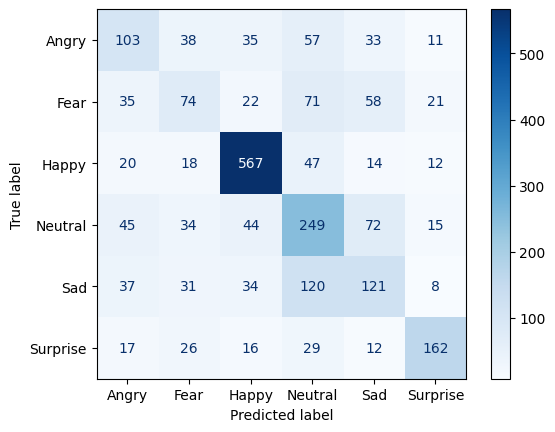

In [28]:

dataset = r'../full_face_connected_landmarks2/'
pasta_treino = os.path.join(dataset, 'treino')
pasta_validacao = os.path.join(dataset, 'validacao')
pasta_teste = os.path.join(dataset, 'teste')

modelo_treinado, historico = treinar_e_validar(resnet50, funcao_erro, otimizador, numero_de_epocas,'full_face_connected_landmarks2.pt')

# Plotar a matriz de confusão do melhor modeloa
plotar_matriz_confusao(modelo_treinado, data_loader_validacao, classes)



Época: 1/20
Treino Epoca - Lote número 000, Erro: 0.5671, Acurácia: 0.8125
Treino Epoca - Lote número 001, Erro: 0.7635, Acurácia: 0.7188
Treino Epoca - Lote número 002, Erro: 1.0436, Acurácia: 0.5938
Treino Epoca - Lote número 003, Erro: 0.8363, Acurácia: 0.7188
Treino Epoca - Lote número 004, Erro: 0.6825, Acurácia: 0.7812
Treino Epoca - Lote número 005, Erro: 0.8565, Acurácia: 0.6250
Treino Epoca - Lote número 006, Erro: 1.0341, Acurácia: 0.5938
Treino Epoca - Lote número 007, Erro: 0.9227, Acurácia: 0.6562
Treino Epoca - Lote número 008, Erro: 0.9980, Acurácia: 0.5938
Treino Epoca - Lote número 009, Erro: 0.8135, Acurácia: 0.6875
Treino Epoca - Lote número 010, Erro: 0.6638, Acurácia: 0.7812
Treino Epoca - Lote número 011, Erro: 0.9481, Acurácia: 0.6562
Treino Epoca - Lote número 012, Erro: 1.0463, Acurácia: 0.5000
Treino Epoca - Lote número 013, Erro: 1.1110, Acurácia: 0.5625
Treino Epoca - Lote número 014, Erro: 0.6804, Acurácia: 0.7812
Treino Epoca - Lote número 015, Erro: 0.9

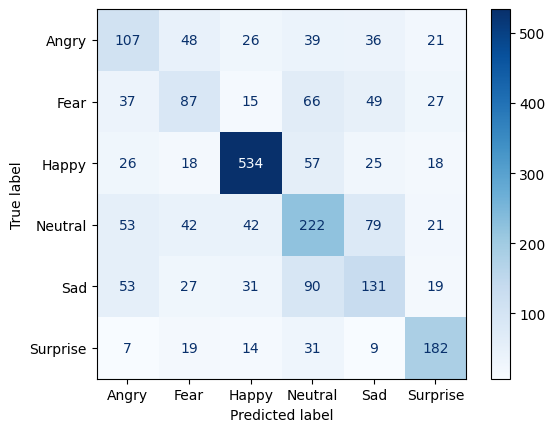

In [29]:

dataset = r'../full_face_landmarks2/'
pasta_treino = os.path.join(dataset, 'treino')
pasta_validacao = os.path.join(dataset, 'validacao')
pasta_teste = os.path.join(dataset, 'teste')

modelo_treinado, historico = treinar_e_validar(resnet50, funcao_erro, otimizador, numero_de_epocas,'full_face_landmarks2.pt')

# Plotar a matriz de confusão do melhor modelo
plotar_matriz_confusao(modelo_treinado, data_loader_validacao, classes)